In [1]:
import numpy as np
np.version.version

'1.16.1'

In [4]:
#import cv2
from matplotlib import pyplot as plt
import glob
import numpy as np
from math import floor
import keras

from skimage.feature import greycomatrix, greycoprops
from skimage import data


%matplotlib notebook


AttributeError: 'property' object has no attribute '__name__'

In [4]:
def imread(path):
    return cv2.imread(path)[:,:,::-1]

In [7]:
images = []
for img_path in glob.glob('UPOL/normalized/*.bmp'):
    images.append(imread(img_path))

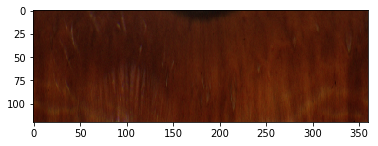

In [8]:
plt.imshow(images[0])

In [21]:
def vectorized_glcm(image, distance, direction):

    img = np.array(image)

    glcm = np.zeros((256, 256), dtype=int)

    if direction == 1:
        first = img[distance:, :]
        second = img[:-distance, :]
    elif direction == 2:
        first = img[distance:, :-distance]
        second = img[:-distance, distance:]
    elif direction == 3:
        first = img[:, :-distance]
        second = img[:, distance:]
    elif direction == 4:
        first = img[:-distance, :-distance]
        second = img[distance:, distance:]

    for i, j in zip(first.ravel(), second.ravel()):
        glcm[i, j] += 1

    return glcm

In [22]:
vct = vectorized_glcm(images[0], 1, 1)

In [23]:
vct

array([[0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])